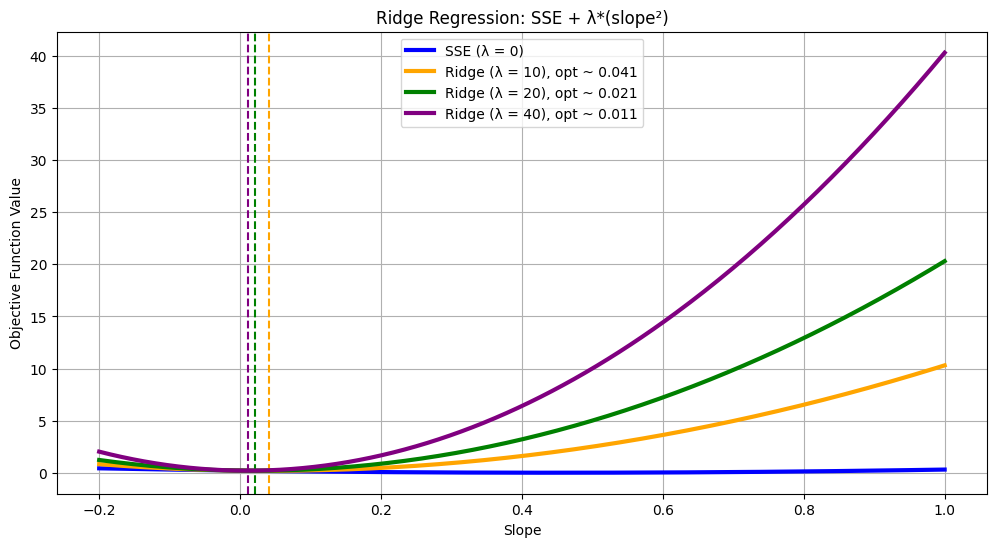

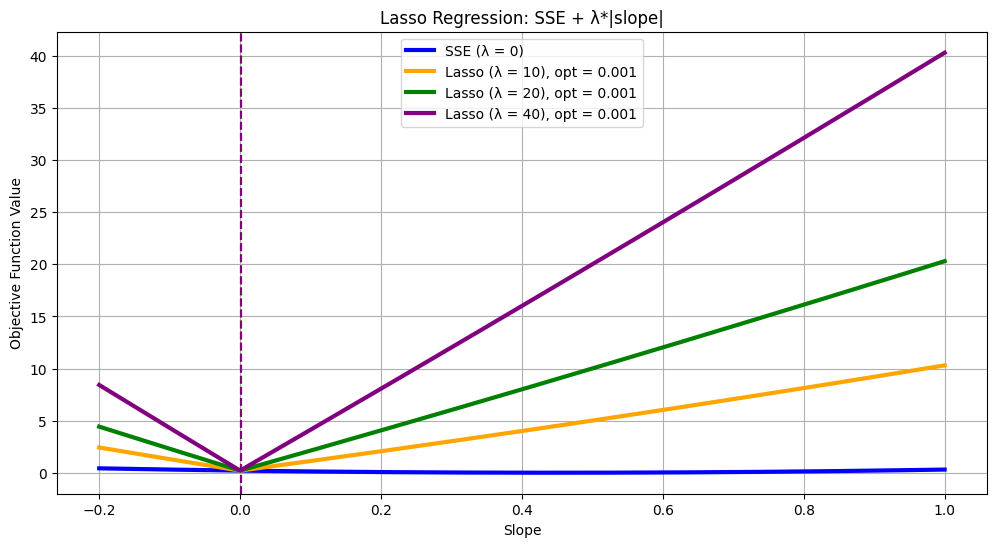

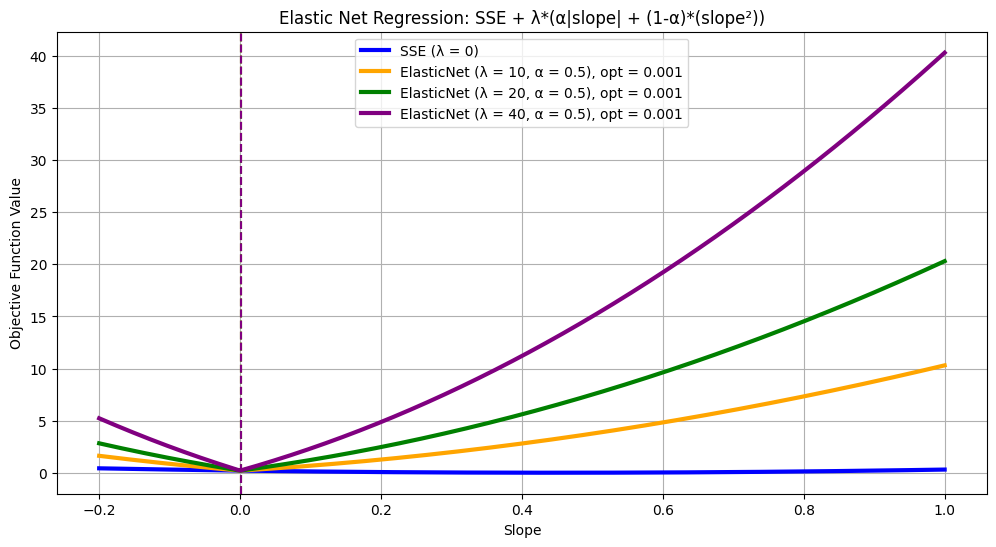

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# True optimal slope (from unpenalized model)
s_true = 0.45

# Define a range of slope values to evaluate
s = np.linspace(-0.2, 1.0, 300)

# Define the Sum of Squared Errors (SSE) function for a given slope:
# Here, we use a simple quadratic: SSE(s) = (s - s_true)².
SSE = (s - s_true)**2

# -----------------------
# 1. Ridge Regression Simulation
# -----------------------
plt.figure(figsize=(12, 6))
plt.plot(s, SSE, label="SSE (λ = 0)", color="blue", linewidth=3)

# Ridge penalty: objective_ridge = SSE + λ * (slope)²
lambdas_ridge = [10, 20, 40]
colors_ridge = ["orange", "green", "purple"]

for lam, col in zip(lambdas_ridge, colors_ridge):
    obj_ridge = SSE + lam * (s**2)
    # For Ridge, the optimal slope can be computed analytically:
    # Derivative of (s - s_true)² + λ s² gives: 2*(s - s_true) + 2λ s = 0 
    # --> s*(1+λ) = s_true, so s* = s_true/(1+λ)
    s_opt_ridge = s_true / (1 + lam)
    plt.plot(s, obj_ridge, label=f"Ridge (λ = {lam}), opt ~ {s_opt_ridge:.3f}", color=col, linewidth=3)
    plt.axvline(s_opt_ridge, color=col, linestyle="--")

plt.xlabel("Slope")
plt.ylabel("Objective Function Value")
plt.title("Ridge Regression: SSE + λ*(slope²)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# 2. Lasso Regression Simulation
# -----------------------
plt.figure(figsize=(12, 6))
plt.plot(s, SSE, label="SSE (λ = 0)", color="blue", linewidth=3)

# Lasso penalty: objective_lasso = SSE + λ * |slope|
lambdas_lasso = [10, 20, 40]
colors_lasso = ["orange", "green", "purple"]

for lam, col in zip(lambdas_lasso, colors_lasso):
    obj_lasso = SSE + lam * np.abs(s)
    # For Lasso, the objective is not differentiable at 0.
    # We find the optimum numerically on our grid.
    idx_min = np.argmin(obj_lasso)
    s_opt_lasso = s[idx_min]
    plt.plot(s, obj_lasso, label=f"Lasso (λ = {lam}), opt = {s_opt_lasso:.3f}", color=col, linewidth=3)
    plt.axvline(s_opt_lasso, color=col, linestyle="--")

plt.xlabel("Slope")
plt.ylabel("Objective Function Value")
plt.title("Lasso Regression: SSE + λ*|slope|")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# 3. Elastic Net Regression Simulation
# -----------------------
# Elastic Net penalty: objective_en = SSE + λ*(α*|slope| + (1-α)*slope²)
# We'll fix α = 0.5 (equal weight to L1 and L2)
alpha = 0.5
plt.figure(figsize=(12, 6))
plt.plot(s, SSE, label="SSE (λ = 0)", color="blue", linewidth=3)

lambdas_en = [10, 20, 40]
colors_en = ["orange", "green", "purple"]

for lam, col in zip(lambdas_en, colors_en):
    obj_en = SSE + lam * (alpha * np.abs(s) + (1 - alpha) * s**2)
    idx_min = np.argmin(obj_en)
    s_opt_en = s[idx_min]
    plt.plot(s, obj_en, label=f"ElasticNet (λ = {lam}, α = {alpha}), opt = {s_opt_en:.3f}", color=col, linewidth=3)
    plt.axvline(s_opt_en, color=col, linestyle="--")

plt.xlabel("Slope")
plt.ylabel("Objective Function Value")
plt.title("Elastic Net Regression: SSE + λ*(α|slope| + (1-α)*(slope²))")
plt.legend()
plt.grid(True)
plt.show()
